<a href="https://colab.research.google.com/github/shubham62025865/project/blob/main/Lecture_13_14_Column_Transformers_and_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Column Transformers and Pipeline

<img width = 800 src = https://images.livemint.com/rf/Image-621x414/LiveMint/Period1/2014/08/23/Photos/gaspipeline--621x414.jpg />

In [ ]:
# importing libraries

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## INTRODUCTION TO COLUMNTRANSFORMER

ColumnTransformer enables us to apply transform to particular columns. It help us to fit multiple transformations to multiple columns with a single **fit() or fit_transform()** statement. For example, we can impute mean in column 1 and OneHotEncode column 2 with a single fit statement.


'ColumnTransformer' can be imported from 'sklearn.compose' module

In [ ]:
df = pd.DataFrame({"col1":["a","b","a","c"],"col2":["a","b","a","c"]})
print(df)

  col1 col2
0    a    a
1    b    b
2    a    a
3    c    c


Conventionally, we create an instance of OneHotEncoder() and fit_transform it to the data frame as shown below

In [ ]:
ohe = OneHotEncoder()
df = ohe.fit_transform(df)
print(df.toarray())

[[1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]]


The above step has onehotencoded both the columns of the data frame. This problem can be solved using ColumnTransformer as shown below.

In [ ]:
df

<4x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
df = pd.DataFrame({"col1":["a","b","a","c"],"col2":["a","b","a","c"]})
print(df)

  col1 col2
0    a    a
1    b    b
2    a    a
3    c    c


In [ ]:
df.columns

Index(['col1', 'col2'], dtype='object')

In [ ]:
df.columns.get_loc("col2")

1

In [ ]:
ct = ColumnTransformer(transformers = [("ohe_col", OneHotEncoder(),[0,1])])
ct

ColumnTransformer(transformers=[('ohe_col', OneHotEncoder(), [0, 1])])

In [ ]:
ct = ColumnTransformer(transformers = [('ohe_col',OneHotEncoder(),[0,1])])
df = ct.fit_transform(df)
df

array([[1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.]])

In [ ]:
df

,col1,col2
0,a,a
1,b,b
2,a,a
3,c,c


In [ ]:
transformer = ColumnTransformer(transformers = [("ord_enc", OrdinalEncoder(), [0]),
                                                ("ohe", OneHotEncoder(), [1])])

transformer.fit_transform(df)

array([[0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 0.],
       [2., 0., 0., 1.]])

In [ ]:
ct = ColumnTransformer(transformers = [('ohe_col1',OneHotEncoder(),[0]),
                                     ('ord_col2',OrdinalEncoder(),[1])])
df = ct.fit_transform(df)
print(df)

[[1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 2.]]


As seen above we could perform multiple transformations on multiple columns with a single fit_transform() statement. This operation would be so complex without the use of ColumnTransformer.

In the above example, what we did is we created an instance of ColumnTransformer and passed an argument 'transformers' which basically is a list/tuple of transformations we want to perform.

Each transformation has 3 parts

- Name of the transform, it can be any unique name.
- Transform itself
- A list of columns to which you want to apply the transform. It should be a list even if you have to apply it to a single column

Consider the dataframe below where we wish to onehotencode 'col1' and retain the 'col2' as it is.

In [ ]:
df = pd.DataFrame({"col1":["a","b","a","c"],"col2":["a","b","a","c"]})
print(df)

  col1 col2
0    a    a
1    b    b
2    a    a
3    c    c


In [ ]:
ct = ColumnTransformer(transformers = [('ohe_col1',OneHotEncoder(),[0])])
df = ct.fit_transform(df)
print(df)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
df = pd.DataFrame({"col1":["a","b","a","c"],"col2":["a","b","a","c"]})
print(df)

  col1 col2
0    a    a
1    b    b
2    a    a
3    c    c


In [ ]:
ct = ColumnTransformer(transformers = [('ohe_col1',OneHotEncoder(),[0])],remainder="passthrough")
df_1 = ct.fit_transform(df)
print(df_1)

[[1.0 0.0 0.0 'a']
 [0.0 1.0 0.0 'b']
 [1.0 0.0 0.0 'a']
 [0.0 0.0 1.0 'c']]


## LIMITATIONS OF COLUMNTRANSFORMER
There are few limitations of ColumnTransformer. They are discussed below

- ColumnTransformer outputs an array even if we input a DataFrame object which makes it difficult to track the columns.
- In a ColumnTransformer we cannot apply multiple transforms to a single column. This is shown below

Consider a dataframe below where we wish to mode impute and onehotencode 'col1' and median impute 'col2'. Here we are trying to perform a 2 transformations on a single column (col1).

In [ ]:
df = pd.DataFrame({"col1":["a","b",np.nan,"a"],"col2":[1,2,np.nan,5]})
print(df)

  col1  col2
0    a   1.0
1    b   2.0
2  NaN   NaN
3    a   5.0


In [ ]:
ct = ColumnTransformer(transformers = [
    ("mode_col1", SimpleImputer(strategy="most_frequent"), [0]),
    ("ord_col1", OrdinalEncoder(), [0]),
    ("median_col2", SimpleImputer(strategy = "median"), [1])
])

ct.fit_transform(df)

array([['a', 0.0, 1.0],
       ['b', 1.0, 2.0],
       ['a', nan, 2.0],
       ['a', 0.0, 5.0]], dtype=object)

In [ ]:
ct = ColumnTransformer(transformers=[('ord_encode1',OrdinalEncoder(),[0])])
df = ct.fit_transform(df)
df


array([[ 0.],
       [ 1.],
       [nan],
       [ 2.]])

In [ ]:
ct_median = ColumnTransformer(transformers = [("median_imputation", SimpleImputer(strategy = "median"),[0])])
df = ct_median.fit_transform(df)
df

array([[0.],
       [1.],
       [1.],
       [2.]])

In [ ]:
                                    ('median_impute2',SimpleImputer(strategy="median"),[0])])


In [ ]:
df = ct.fit_transform(df)
print(df)

ValueError: ignored

## INTRODUCTION TO PIPELINE

<img width = 800 src = https://vitalflux.com/wp-content/uploads/2020/08/ML-Pipeline-Page-2-1024x307.png />

Pipeline is a sequence of operations where output of one operation becomes input to its subsequent operation. In the example below we'll first median impute the columns in dataframe and then perform Minmaxscaling on them



In [ ]:
df = pd.DataFrame({"col1":[1,2,np.nan,3],"col2":[1,np.nan,1,5]})
print(df)

   col1  col2
0   1.0   1.0
1   2.0   NaN
2   NaN   1.0
3   3.0   5.0


In [ ]:
pipe = Pipeline(steps = [
    ("median_imp", SimpleImputer(strategy = "mean")),
    ("scale", StandardScaler())
])

In [ ]:
pipe.fit_transform(df)

array([[-1.41421356, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.        , -0.81649658],
       [ 1.41421356,  1.63299316]])

In [ ]:
pipe = Pipeline(steps=[('imputation',SimpleImputer(strategy="mean")),
                      ("scaling",MinMaxScaler())])
df = pipe.fit_transform(df)
print(df)

[[0.         0.        ]
 [0.5        0.33333333]
 [0.5        0.        ]
 [1.         1.        ]]


As seen above we could perform multiple transformations with a single fit() or fit_transform() statement. Unlike ColumnTransformer, Pipelines follow a sequential process, where output of previous step becomes input of next step. The above operation is conventionally performed as shown below.

What happened in the Pipeline?

Similar to ColumnTransformer, Pipeline takes input of steps, which can be a classifier, transform, etc. 

Each step in Pipeline has 2 parts:

- Name of step
- The operation itself.

In [ ]:
df = pd.DataFrame({"col1":[1,2,np.nan,3],"col2":[1,np.nan,1,5]})
print(df)

   col1  col2
0   1.0   1.0
1   2.0   NaN
2   NaN   1.0
3   3.0   5.0


In [ ]:
df = SimpleImputer(strategy = "median").fit_transform(df)
df = MinMaxScaler().fit_transform(df)
df

array([[0. , 0. ],
       [0.5, 0. ],
       [0.5, 0. ],
       [1. , 1. ]])

In [ ]:
df = SimpleImputer(strategy="median").fit_transform(df)
df = MinMaxScaler().fit_transform(df)
print(df)

[[0.  0. ]
 [0.5 0. ]
 [0.5 0. ]
 [1.  1. ]]


Conventional process takes 2 fit_transform steps where as use of Pipeline brings it down to 1.

## LIMITATIONS OF PIPELINE
- Similar to ColumnTransformer, Pipeline also outputs an array.
- As in ColumnTransformer, we cannot specify the column which we want to transform.

## CLUBBING COLUMNTRANSFORMER AND PIPELINE

A seen in one of the examples previously, we couldn't apply multiple transforms on a single column using ColumnTransformer. We got an error on trying it. Lets discuss the example once again.

Consider a dataframe below where we wish to mode impute and onehotencode 'col1' and median impute 'col2'. Here we are trying to perform a 2 transformations on a single column (col1) and median imput on 'col2'

In [ ]:
df = pd.DataFrame({"col1":["a","b",np.nan,"a"],"col2":[1,2,np.nan,5]})
print(df)

  col1  col2
0    a   1.0
1    b   2.0
2  NaN   NaN
3    a   5.0


In [ ]:
col1_pipe = Pipeline(steps=[('mode_col1',SimpleImputer(strategy="most_frequent")),
                           ("one_hot_encode",OneHotEncoder())])

col_transform = ColumnTransformer(transformers=[("col1",col1_pipe,[0]),
                                               ("col2",SimpleImputer(strategy="median"),[1])])

df = col_transform.fit_transform(df)
print(df)

[[1. 0. 1.]
 [0. 1. 2.]
 [1. 0. 2.]
 [1. 0. 5.]]


In [ ]:
df= pd.read_csv("/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Drop id column from df
df.drop(columns = ["Id"], inplace = True)

# seperate target column
X = df.drop(columns = ["SalePrice"])
y = df["SalePrice"]

In [ ]:
X.isnull().mean().sort_values(ascending = False)[:30] * 100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageFinish     5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
BedroomAbvGr     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
KitchenAbvGr     0.000000
HalfBath         0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
MSSubClass       0.000000
GrLivArea        0.000000
dtype: float64

In [ ]:
X.isnull().mean()[X.isnull().mean() < 0.2]

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
Length: 74, dtype: float64

In [ ]:
X.isnull().mean()[X.isnull().mean() < .20].sort_values(ascending = False)

LotFrontage      0.177397
GarageType       0.055479
GarageCond       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
                   ...   
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
MSZoning         0.000000
HeatingQC        0.000000
SaleCondition    0.000000
Length: 74, dtype: float64

In [ ]:
s = X.isnull().mean()[X.isnull().mean() < .20].sort_values(ascending = False)
s

LotFrontage      0.177397
GarageType       0.055479
GarageCond       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
                   ...   
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
MSZoning         0.000000
HeatingQC        0.000000
SaleCondition    0.000000
Length: 74, dtype: float64

In [ ]:
col = s.index
col

Index(['LotFrontage', 'GarageType', 'GarageCond', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType',
       'Electrical', 'PavedDrive', 'PoolArea', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'SaleType',
       'BedroomAbvGr', 'YrSold', 'MoSold', 'MiscVal', 'KitchenAbvGr',
       'WoodDeckSF', 'KitchenQual', 'TotRmsAbvGrd', 'ScreenPorch', '3SsnPorch',
       'Functional', 'Fireplaces', '2ndFlrSF', 'EnclosedPorch', 'OpenPorchSF',
       'GarageCars', 'GarageArea', 'MSSubClass', 'Heating', '1stFlrSF',
       'CentralAir', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'Exter

In [ ]:
col = X.isnull().mean()[X.isnull().mean() < .20].index
col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [ ]:
# Break off validation set from training data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X[col], y,
                                                      train_size=0.8,
                                                      random_state=0)

print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_valid -: {X_valid.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_valid -: {y_valid.shape}')

Shape of X_train -: (1168, 74)
Shape of X_valid -: (292, 74)
Shape of y_train -: (1168,)
Shape of y_valid -: (292,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [ ]:
# cat_col = [col for col in X_train.columns if X_train[col].dtype == object]

In [ ]:
# Seperating numerical and categorical columns
num_col = [col for col in X_train.columns if X_train[col].dtype !=object]
cat_col = [col for col in X_train.columns if X_train[col].dtype ==object]

In [ ]:
X_train[num_col]

,LotFrontage,GarageYrBlt,MasVnrArea,PoolArea,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,1stFlrSF,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
618,90.0,2007.0,452.0,0,0,1828,0,0,2,0,...,1828,11694,9,5,2007,2007,48,0,1774,1822
870,60.0,1962.0,0.0,0,0,894,0,0,1,0,...,894,6600,5,5,1962,1962,0,0,894,894
92,80.0,1921.0,0.0,0,0,964,1,0,1,0,...,964,13360,5,7,1921,2006,713,0,163,876
817,NaN,2002.0,148.0,0,0,1689,1,0,2,0,...,1689,13265,8,5,2002,2002,1218,0,350,1568
302,118.0,2001.0,150.0,0,0,1541,0,0,2,0,...,1541,13704,7,5,2001,2002,0,0,1541,1541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,82.0,1999.0,673.0,0,0,2365,1,0,2,1,...,1268,9430,8,5,1999,1999,1163,0,89,1252
835,60.0,1996.0,0.0,0,0,1067,0,0,2,0,...,1067,9600,4,7,1950,1995,442,0,625,1067
1216,68.0,1978.0,0.0,0,0,1902,0,0,2,0,...,1318,8930,6,5,1978,1978,0,0,0,0
559,NaN,2003.0,18.0,0,0,1557,0,0,2,0,...,1557,3196,7,5,2003,2004,0,0,1374,1374


In [ ]:
X_train[cat_col]

,GarageType,GarageCond,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,MSZoning,HeatingQC,SaleCondition
618,Attchd,TA,Unf,TA,Unf,Av,GLQ,TA,Ex,BrkFace,...,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,RL,Ex,Partial
870,Detchd,TA,Unf,TA,Unf,No,Unf,TA,TA,None,...,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,RL,Gd,Normal
92,Detchd,TA,Unf,TA,Unf,No,ALQ,TA,Gd,None,...,Gable,CompShg,Wd Sdng,Wd Sdng,TA,Gd,BrkTil,RL,Ex,Normal
817,Attchd,TA,RFn,TA,Unf,No,GLQ,TA,Gd,BrkFace,...,Hip,CompShg,CemntBd,CmentBd,Gd,TA,PConc,RL,Ex,Normal
302,Attchd,TA,RFn,TA,Unf,No,Unf,TA,Gd,BrkFace,...,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,RL,Ex,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Attchd,TA,RFn,TA,Unf,Mn,GLQ,TA,Gd,BrkFace,...,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,RL,Ex,Normal
835,Attchd,TA,Unf,TA,Unf,No,BLQ,TA,Gd,None,...,Gable,CompShg,VinylSd,HdBoard,TA,TA,CBlock,RL,TA,Normal
1216,Attchd,TA,Unf,TA,NaN,NaN,NaN,NaN,NaN,None,...,Gable,CompShg,VinylSd,VinylSd,TA,TA,Slab,RM,TA,Normal
559,Attchd,TA,Fin,TA,Unf,Gd,Unf,TA,Gd,BrkFace,...,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,RL,Ex,Normal


In [ ]:
X_train

,LotFrontage,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,...,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSZoning,HeatingQC,SaleCondition
618,90.0,Attchd,TA,2007.0,Unf,TA,Unf,Av,GLQ,TA,...,Ex,TA,PConc,48,0,1774,1822,RL,Ex,Partial
870,60.0,Detchd,TA,1962.0,Unf,TA,Unf,No,Unf,TA,...,TA,TA,CBlock,0,0,894,894,RL,Gd,Normal
92,80.0,Detchd,TA,1921.0,Unf,TA,Unf,No,ALQ,TA,...,TA,Gd,BrkTil,713,0,163,876,RL,Ex,Normal
817,NaN,Attchd,TA,2002.0,RFn,TA,Unf,No,GLQ,TA,...,Gd,TA,PConc,1218,0,350,1568,RL,Ex,Normal
302,118.0,Attchd,TA,2001.0,RFn,TA,Unf,No,Unf,TA,...,Gd,TA,PConc,0,0,1541,1541,RL,Ex,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,82.0,Attchd,TA,1999.0,RFn,TA,Unf,Mn,GLQ,TA,...,Gd,TA,PConc,1163,0,89,1252,RL,Ex,Normal
835,60.0,Attchd,TA,1996.0,Unf,TA,Unf,No,BLQ,TA,...,TA,TA,CBlock,442,0,625,1067,RL,TA,Normal
1216,68.0,Attchd,TA,1978.0,Unf,TA,NaN,NaN,NaN,NaN,...,TA,TA,Slab,0,0,0,0,RM,TA,Normal
559,NaN,Attchd,TA,2003.0,Fin,TA,Unf,Gd,Unf,TA,...,Gd,TA,PConc,0,0,1374,1374,RL,Ex,Normal


In [ ]:
X_train.head()

,LotFrontage,GarageType,GarageCond,GarageYrBlt,GarageFinish,GarageQual,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,...,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,MSZoning,HeatingQC,SaleCondition
618,90.0,Attchd,TA,2007.0,Unf,TA,Unf,Av,GLQ,TA,...,Ex,TA,PConc,48,0,1774,1822,RL,Ex,Partial
870,60.0,Detchd,TA,1962.0,Unf,TA,Unf,No,Unf,TA,...,TA,TA,CBlock,0,0,894,894,RL,Gd,Normal
92,80.0,Detchd,TA,1921.0,Unf,TA,Unf,No,ALQ,TA,...,TA,Gd,BrkTil,713,0,163,876,RL,Ex,Normal
817,NaN,Attchd,TA,2002.0,RFn,TA,Unf,No,GLQ,TA,...,Gd,TA,PConc,1218,0,350,1568,RL,Ex,Normal
302,118.0,Attchd,TA,2001.0,RFn,TA,Unf,No,Unf,TA,...,Gd,TA,PConc,0,0,1541,1541,RL,Ex,Normal


In [ ]:
X_train = X_train[num_col + cat_col]
X_valid = X_valid[num_col + cat_col]

In [ ]:
X_train.head()

,LotFrontage,GarageYrBlt,MasVnrArea,PoolArea,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,MSZoning,HeatingQC,SaleCondition
618,90.0,2007.0,452.0,0,0,1828,0,0,2,0,...,Hip,CompShg,CemntBd,CmentBd,Ex,TA,PConc,RL,Ex,Partial
870,60.0,1962.0,0.0,0,0,894,0,0,1,0,...,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,RL,Gd,Normal
92,80.0,1921.0,0.0,0,0,964,1,0,1,0,...,Gable,CompShg,Wd Sdng,Wd Sdng,TA,Gd,BrkTil,RL,Ex,Normal
817,NaN,2002.0,148.0,0,0,1689,1,0,2,0,...,Hip,CompShg,CemntBd,CmentBd,Gd,TA,PConc,RL,Ex,Normal
302,118.0,2001.0,150.0,0,0,1541,0,0,2,0,...,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,RL,Ex,Normal


In [ ]:
len(num_col)

36

In [ ]:
X_train.columns.get_loc("TotalBsmtSF")

35

In [ ]:
X_train.iloc[:,:36].head()

,LotFrontage,GarageYrBlt,MasVnrArea,PoolArea,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,1stFlrSF,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
618,90.0,2007.0,452.0,0,0,1828,0,0,2,0,...,1828,11694,9,5,2007,2007,48,0,1774,1822
870,60.0,1962.0,0.0,0,0,894,0,0,1,0,...,894,6600,5,5,1962,1962,0,0,894,894
92,80.0,1921.0,0.0,0,0,964,1,0,1,0,...,964,13360,5,7,1921,2006,713,0,163,876
817,NaN,2002.0,148.0,0,0,1689,1,0,2,0,...,1689,13265,8,5,2002,2002,1218,0,350,1568
302,118.0,2001.0,150.0,0,0,1541,0,0,2,0,...,1541,13704,7,5,2001,2002,0,0,1541,1541


In [ ]:
X_train.iloc[:,:36].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
618,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
870,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
92,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
817,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
302,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


In [ ]:
len(X_train.columns)

74

In [ ]:
X_train.iloc[:,36:len(X_train.columns)].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
618,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,New,Partial
870,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
92,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
817,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
302,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
# List slicing
L = [0,1, 2, 3, 4, 5]
s1 = slice(3)
s2 = slice(1,4)

print("List slicing")
print(L[s1])
print(L[s2])

List slicing
[0, 1, 2]
[1, 2, 3]


In [ ]:

ct_imputation = ColumnTransformer([
    ('mean_imputer',SimpleImputer(strategy = "mean"),slice(0,36)),
    ('mode_imputer',SimpleImputer(strategy='most_frequent'),slice(36,len(X_train.columns)))
],remainder# imputation column transformer='passthrough')

In [ ]:
# one hot encoding
ct_ohe = ColumnTransformer([
    ('ohe_cat_columns',OneHotEncoder(sparse=False,handle_unknown='ignore'),slice(36,len(X_train.columns)))
],remainder='passthrough')

In [ ]:
# Scaling
ct_scale = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,36))
])

In [ ]:
# define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

Transforming on column name basis

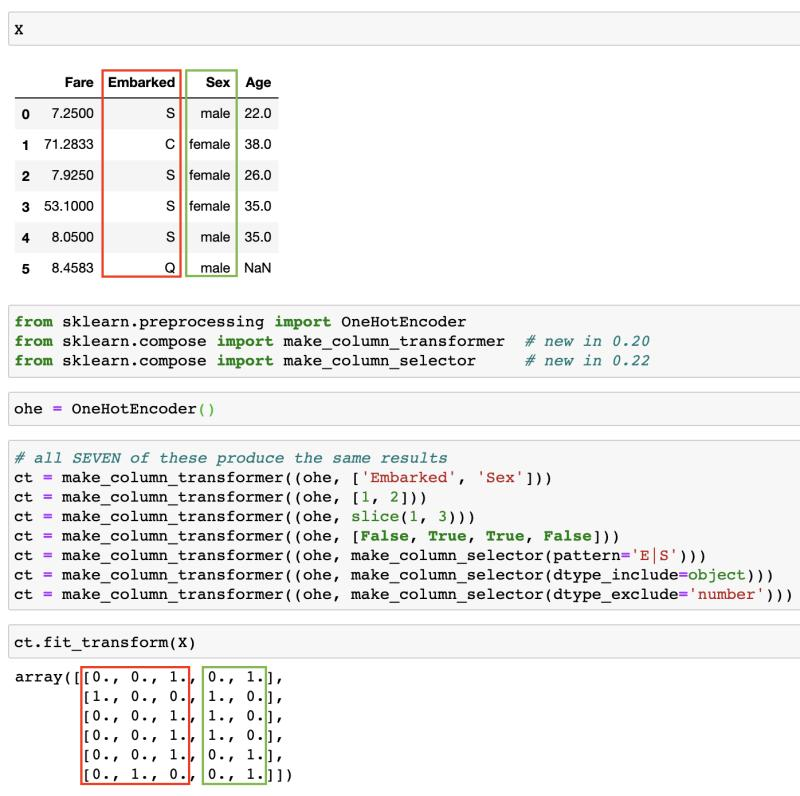


In [ ]:
# imputation column transformer
ct_imputation = ColumnTransformer([
    ('mean_imputer',SimpleImputer(strategy = "mean"),num_col),
    ('mode_imputer',SimpleImputer(strategy='most_frequent'),cat_col)
],remainder='passthrough')

In [ ]:
a = ct_imputation.fit_transform(X_train)
a


array([[90.0, 2007.0, 452.0, ..., 'RL', 'Ex', 'Partial'],
       [60.0, 1962.0, 0.0, ..., 'RL', 'Gd', 'Normal'],
       [80.0, 1921.0, 0.0, ..., 'RL', 'Ex', 'Normal'],
       ...,
       [68.0, 1978.0, 0.0, ..., 'RM', 'TA', 'Normal'],
       [69.61401673640168, 2003.0, 18.0, ..., 'RL', 'Ex', 'Normal'],
       [58.0, 1998.0, 30.0, ..., 'RL', 'Gd', 'Normal']], dtype=object)

In [ ]:
pd.DataFrame(ct_imputation.fit_transform(X_train)).isnull().sum().sort_values(ascending = False)


0     0
55    0
53    0
52    0
51    0
     ..
24    0
23    0
22    0
21    0
73    0
Length: 74, dtype: int64

In [ ]:
# make pipeline
pipe = Pipeline(steps = [
    ('ct_imputation',ct_imputation),
    ('ct_ohe',ct_ohe),
    ('ct_scale',ct_scale),
    # ('model',model)
])

In [ ]:
# train
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct_imputation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_imputer',
                                                  SimpleImputer(),
                                                  slice(0, 36, None)),
                                                 ('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(36, 74, None))])),
                ('ct_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_cat_columns',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(36, 74, None))])),
                ('ct_scale',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 36, None))]))])

In [ ]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [ ]:
# train
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct_imputation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mean_imputer',
                                                  SimpleImputer(),
                                                  slice(0, 36, None)),
                                                 ('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  slice(36, 74, None))])),
                ('ct_ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_cat_columns',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  slice(36, 74, None))])),
                ('ct_scale',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 36, None))])),
                ('model', RandomForestRegressor(random_state=0))])

In [ ]:
# Predict
preds = pipe.predict(X_valid)

In [ ]:
y_valid

529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
326     324000
440     555000
1387    136000
1323     82500
61      101000
Name: SalePrice, Length: 292, dtype: int64

In [ ]:
mean_absolute_error(y_valid, preds)

43332.52790480591

In [ ]:
pipe.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [ ]:
pipe.transform(X_valid)

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.]])